# Removal of stimulation artifact

In [109]:
import neo
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import kurtosis
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns

## Loadning of data

### 2D data

In [13]:
# List of filenames for each eye
filenames_2D = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5"
]


# Initialize an empty list to hold the data from all eyes
all_data_2D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D.append(data_SA)

all_data_2D = np.array(all_data_2D)
all_data_2D = np.transpose(all_data_2D, (0, 2, 1)) 
average_per_eye_2D = np.mean(all_data_2D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_2D)}")
print(f"Data shape: {np.shape(average_per_eye_2D)}")



Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


### 3D data

In [110]:
# List of filenames for each eye
filenames_3D = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D.append(data_SA)

all_data_3D = np.array(all_data_3D)
all_data_3D = np.transpose(all_data_3D, (0, 2, 1)) 
average_per_eye_3D = np.mean(all_data_3D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D)}")
print(f"Data shape: {np.shape(average_per_eye_3D)}")


Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


In [111]:
# List of filenames for each eye
filenames_3D_TTX = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms_TTX004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms_TTX020.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms_TTX005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D_TTX = []
filtered_data_TTX = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_TTX:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_TTX.append(data_SA)

all_data_3D_TTX = np.array(all_data_3D_TTX)
all_data_3D_TTX = np.transpose(all_data_3D_TTX, (0, 2, 1)) 
average_per_eye_3D_TTX = np.mean(all_data_3D_TTX, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D_TTX)}")
print(f"Data shape: {np.shape(average_per_eye_3D_TTX)}")


Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms_TTX007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms_TTX004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms_TTX007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms_TTX020.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms_TTX005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


## Template subtraction - Channel wise

In [28]:
eye_index = 4
channel_index = 1
offset = 3000
sa_length = 300 
start = 280
end = start + sa_length
no_sa = 100 

In [112]:
eye_index = 5
channel_index = 1
offset = 3000
sa_length = 300 
start = 1380
end = start + sa_length
no_sa = 100 

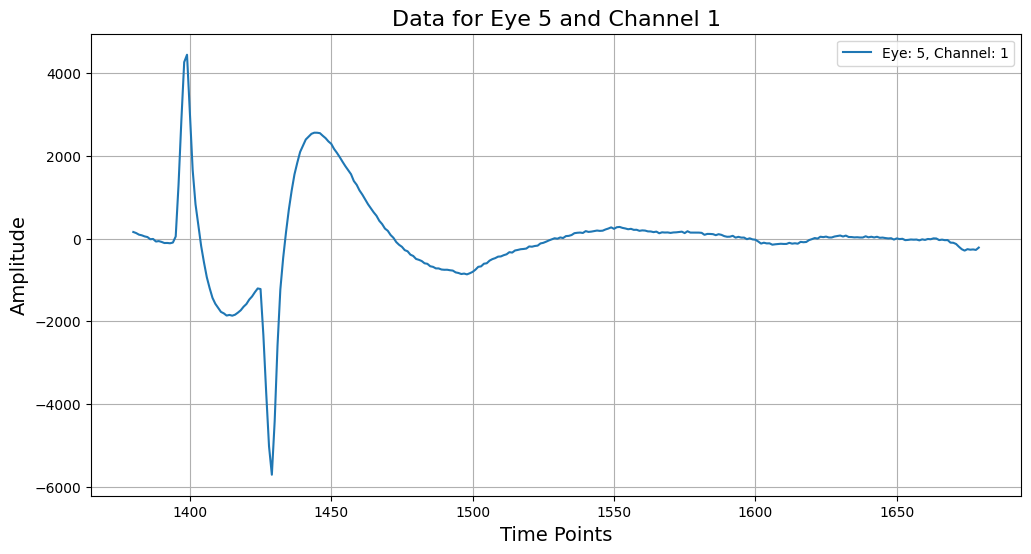

In [113]:
# Function to plot data for a specific eye and channel
def plot_data(all_data, eye_index, channel_index, start, end):
    # Extract the specified data
    data_to_plot = all_data[eye_index, channel_index, start:end]
    
    # Create the time axis for the x-axis
    time_axis = np.arange(start, end)

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(time_axis, data_to_plot, label=f'Eye: {eye_index}, Channel: {channel_index}')
    plt.title(f'Data for Eye {eye_index} and Channel {channel_index}', fontsize=16)
    plt.xlabel('Time Points', fontsize=14)
    plt.ylabel('Amplitude', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

# Call the plotting function
plot_data(all_data_3D_TTX, eye_index, channel_index, start, end)


In [114]:
def collect_and_average_stimulation_artifacts(all_data, eye_index, start, sa_length, offset, no_sa):
    ttx = all_data[eye_index]
    
    # Create a list to store the average artifact for each channel
    average_artifacts_per_channel = []
    
    for channel in range(ttx.shape[0]):
        channel_data = ttx[channel]
        sa = []
        
        for i in range(no_sa):
            end_index = start + sa_length + i * offset
            if end_index <= len(channel_data):
                sa.append(channel_data[start + i * offset: end_index])
            else:
                print(f"Skipping channel {channel}, artifact {i}: Out of bounds (end_index={end_index})")
        
        sa = np.array(sa)
        average_artifact = sa.mean(axis=0)
        average_artifacts_per_channel.append(average_artifact)

    average_artifacts_per_channel = np.array(average_artifacts_per_channel)
    
    return average_artifacts_per_channel


def plot_average_stimulation_artifacts(stimulation_artifacts_per_channel, sampling_rate=30000):
    n_channels, sa_length = stimulation_artifacts_per_channel.shape
    time = np.arange(0, sa_length) / sampling_rate  # Time axis in seconds


    plt.figure(figsize=(12, 6))
    

    colormap = cm.get_cmap('magma', n_channels)

    for channel in range(n_channels):
        color = colormap(channel / n_channels)
        plt.plot(time, stimulation_artifacts_per_channel[channel], label=f'Channel {channel+1}', color=color, linewidth=1)


    plt.title("Average of 100 TTX Stimulation Artifacts for All Channels", fontsize=16)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Voltage (uV)', fontsize=14) 
    plt.grid(True)
    
    plt.legend(loc='upper right', fontsize=8, ncol=4)  # Adjust legend if too cluttered
    
    plt.show()



/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_4273/3086295267.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('magma', n_channels)


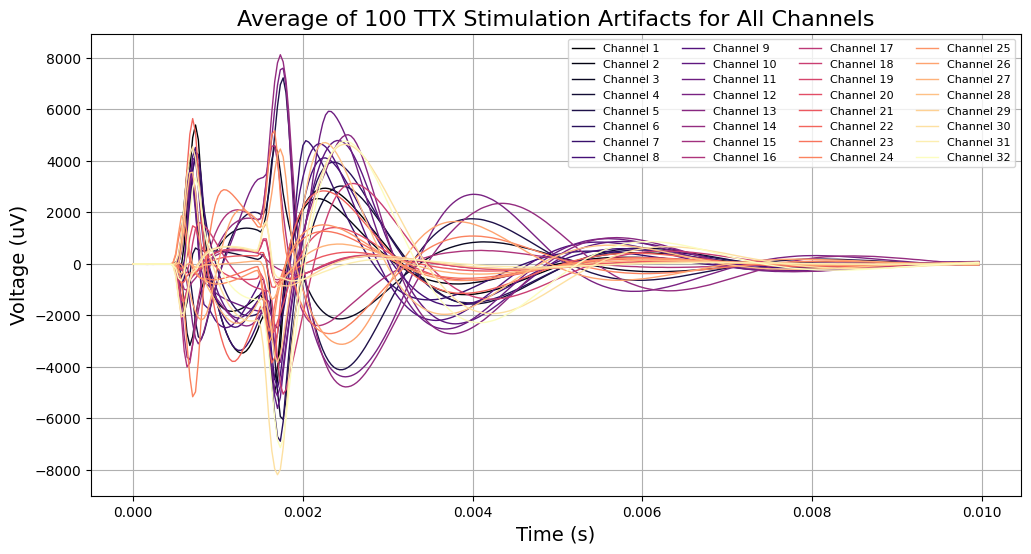

In [115]:
# Collect and average the stimulation artifacts
stimulation_artifact_ttx = collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index, start, sa_length, offset, no_sa)

# Plot the averaged stimulation artifact
plot_average_stimulation_artifacts(stimulation_artifact_ttx)

### PCA and clustering

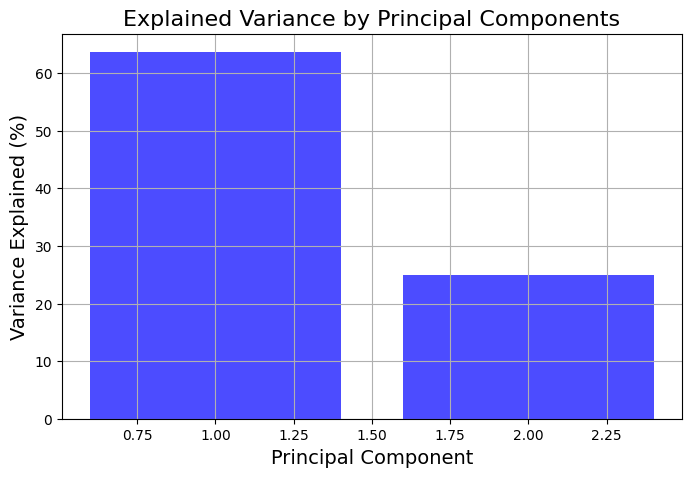

In [116]:
def perform_pca_and_plot(stimulation_artifact_ttx, n_components=2):

    scaler = StandardScaler()
    data_std = scaler.fit_transform(stimulation_artifact_ttx)

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data_std)
    
    explained_variance = pca.explained_variance_ratio_

    # Plot the explained variance
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, n_components + 1), explained_variance * 100, color='blue', alpha=0.7)
    plt.xlabel('Principal Component', fontsize=14)
    plt.ylabel('Variance Explained (%)', fontsize=14)
    plt.title('Explained Variance by Principal Components', fontsize=16)
    plt.grid(True)
    plt.show()

    # Plot the first two principal components
    # plt.figure(figsize=(10, 6))
    # plt.scatter(pca_result[:, 0], pca_result[:, 1], c='green', alpha=0.5)
    # plt.xlabel('Principal Component 1', fontsize=14)
    # plt.ylabel('Principal Component 2', fontsize=14)
    # plt.title('Projection onto First Two Principal Components', fontsize=16)
    # plt.grid(True)
    # plt.show()

# Perform PCA and plot the results
perform_pca_and_plot(stimulation_artifact_ttx, n_components=2)


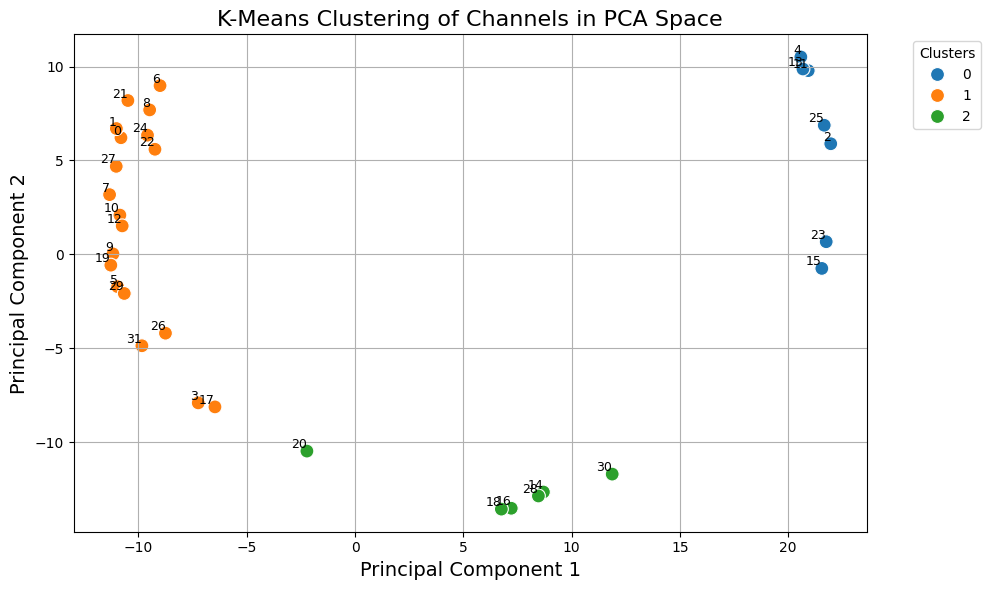

UnboundLocalError: cannot access local variable 'extra_data_std' where it is not associated with a value

In [117]:
def cluster_channels(stimulation_artifact_ttx, n_clusters=3, n_components=2, extra_data=None, extra_data_label=None):
    extra_data = []
    # Standardize the data
    scaler = StandardScaler()
    stimulation_artifact_ttx_std = scaler.fit_transform(stimulation_artifact_ttx.T).T

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(stimulation_artifact_ttx_std)
    
    # K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='tab10', s=100)
    
    for i in range(pca_result.shape[0]):
        plt.text(pca_result[i, 0], pca_result[i, 1], str(i), fontsize=9, ha='right', va='bottom')

    # If extra data is provided, transform it and plot
    if extra_data is not None:
        extra_data_std = scaler.fit_transform(extra_data.reshape(1, -1).T).T  
        extra_data_pca = pca.transform(extra_data_std)
        
        if extra_data_label is None:
            extra_data_label = kmeans.predict(extra_data_pca)[0] 
        
        # Plot the extra data point
        plt.scatter(extra_data_pca[:, 0], extra_data_pca[:, 1], color='red', s=150, label=f"New Data (Cluster {extra_data_label})", edgecolor='black')
        plt.text(extra_data_pca[:, 0], extra_data_pca[:, 1], 'New', fontsize=12, ha='left', va='bottom', color='red')

    plt.title('K-Means Clustering of Channels in PCA Space', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.grid(True)
    plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    return labels, extra_data_label, stimulation_artifact_ttx_std, extra_data_std, pca, kmeans


n_clusters = 3

# Perform clustering on the channels
cluster_labels, extra_data_label, stimulation_artifact_ttx_std, extra_data_std, pca_model, kmeans_model = cluster_channels(stimulation_artifact_ttx, n_clusters, n_components=2)

# Print the cluster labels for each channel
print("Cluster labels for each channel:", cluster_labels)


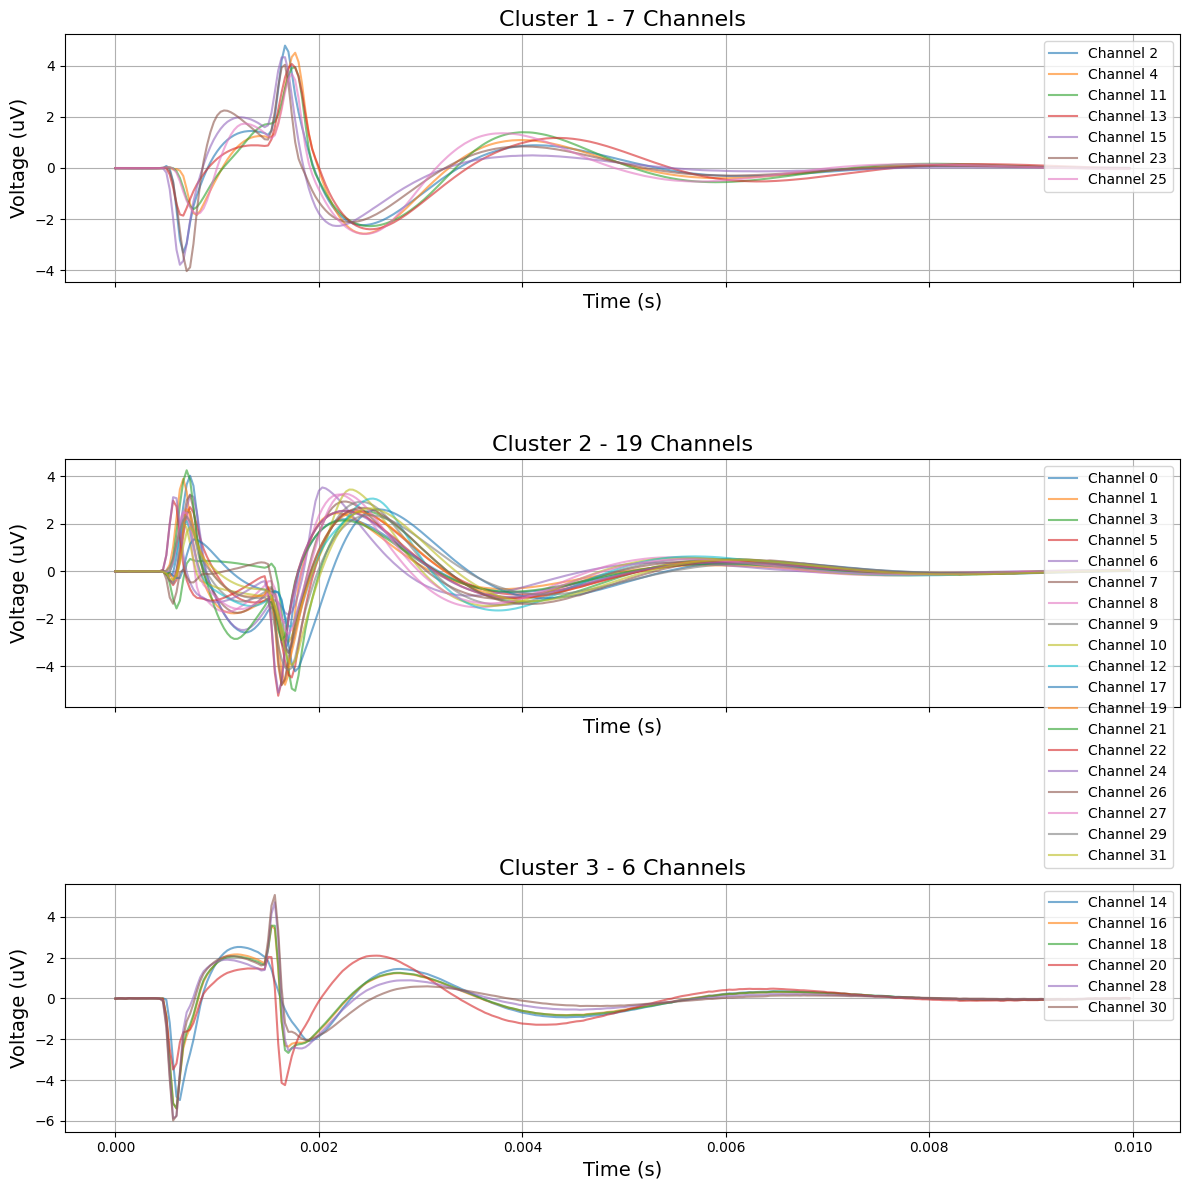

In [75]:
def plot_data_by_cluster(stimulation_artifact_ttx, cluster_labels, n_clusters, sampling_rate=30000):

    time = np.arange(0, stimulation_artifact_ttx.shape[1]) / sampling_rate 

    fig, axs = plt.subplots(n_clusters, 1, figsize=(12, 4 * n_clusters), sharex=True)
    

    for cluster in range(n_clusters):
        ax = axs[cluster]

        channels_in_cluster = np.where(cluster_labels == cluster)[0]
        
        for channel in channels_in_cluster:
            ax.plot(time, stimulation_artifact_ttx[channel], alpha=0.6, label=f'Channel {channel}')
        
        ax.set_title(f'Cluster {cluster + 1} - {len(channels_in_cluster)} Channels', fontsize=16)
        ax.set_xlabel('Time (s)', fontsize=14)
        ax.set_ylabel('Voltage (uV)', fontsize=14)
        ax.grid(True)
        ax.legend(loc='upper right', fontsize=10)


    plt.tight_layout()
    plt.show()



# Plot original data by clusters
plot_data_by_cluster(stimulation_artifact_ttx_std, cluster_labels, n_clusters)


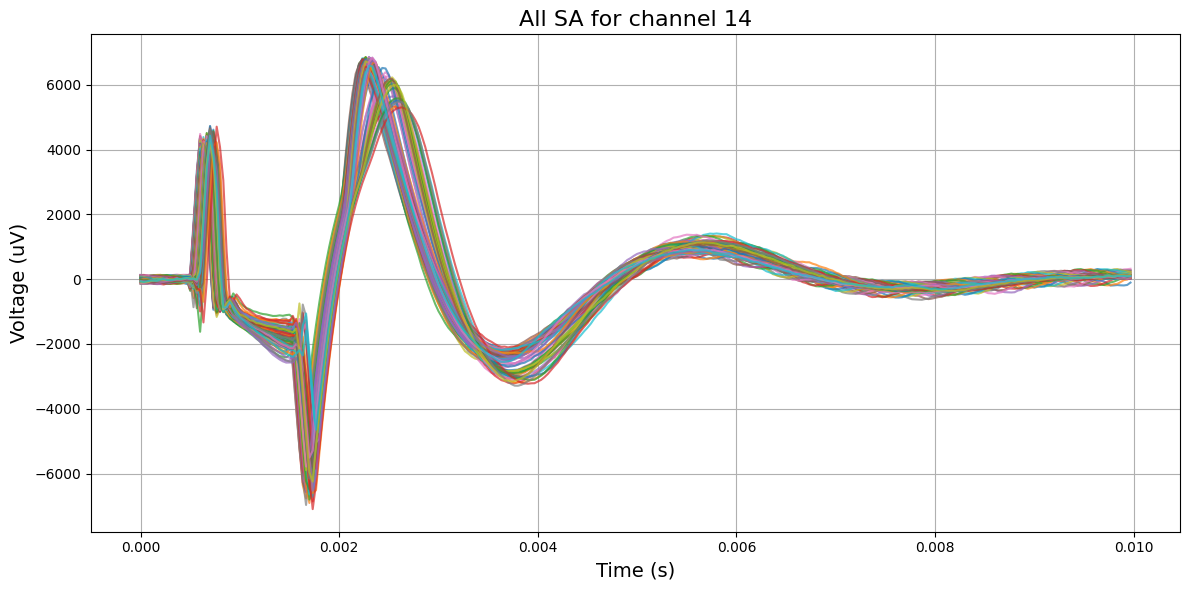

In [56]:
ttx = all_data_3D_TTX[eye_index]

average_artifacts_per_channel = []

channel_no = 10
channel_data = ttx[channel_no]
sa = []

for i in range(no_sa):
    end_index = start + sa_length + i * offset
    if end_index <= len(channel_data):
        sa.append(channel_data[start + i * offset: end_index])

sa = np.array(sa)

# Plot all the average artifacts in the same plot
plt.figure(figsize=(12, 6))

# Time axis for the artifact
time = np.arange(sa_length) / 30000  # Assuming a sampling rate of 30,000 Hz

for channel, artifact in enumerate(sa):
    plt.plot(time, artifact, label=f'{channel}', alpha=0.7)

plt.title("All SA for channel 14", fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Voltage (uV)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Used to validate that a channels SA is the same as thourgh out the whole experiment



### Cluster SA for non-TTX

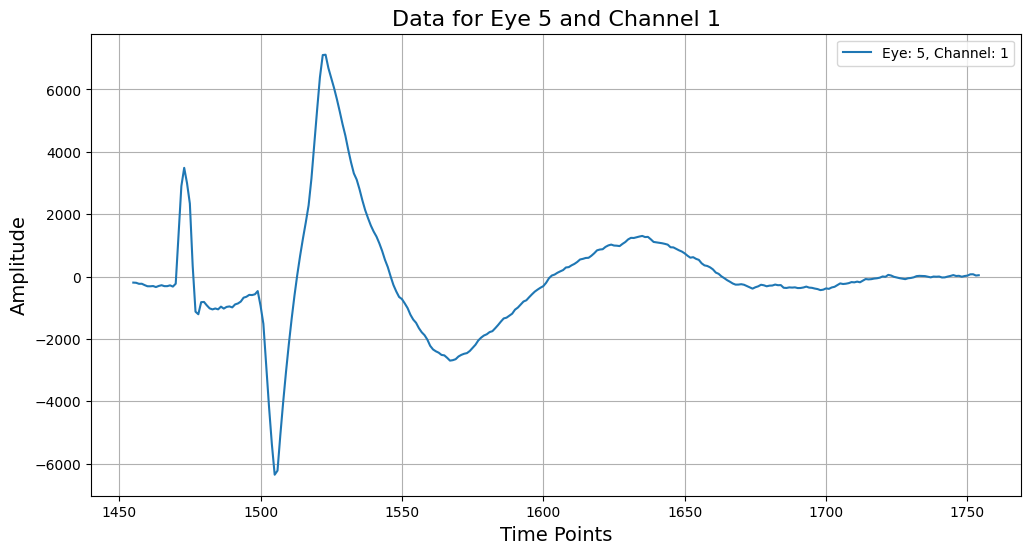

In [99]:
eye_index = 5
channel_index = 1
offset = 3000
sa_length = 300 
start = 1455
end = start + sa_length
no_sa = 100 

plot_data(all_data_3D, eye_index, channel_index, start, end)


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_4273/2688142883.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('magma', n_channels)


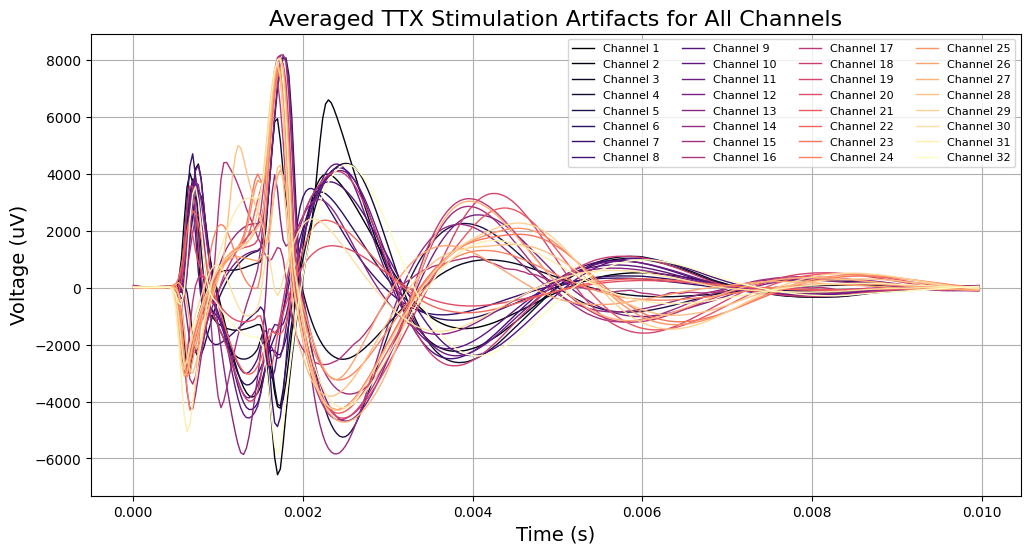

In [100]:
# Collect and average the stimulation artifacts
stimulation_artifact = collect_and_average_stimulation_artifacts(all_data_3D, eye_index, start, sa_length, offset, no_sa)

# Plot the averaged stimulation artifact
plot_average_stimulation_artifacts(stimulation_artifact)

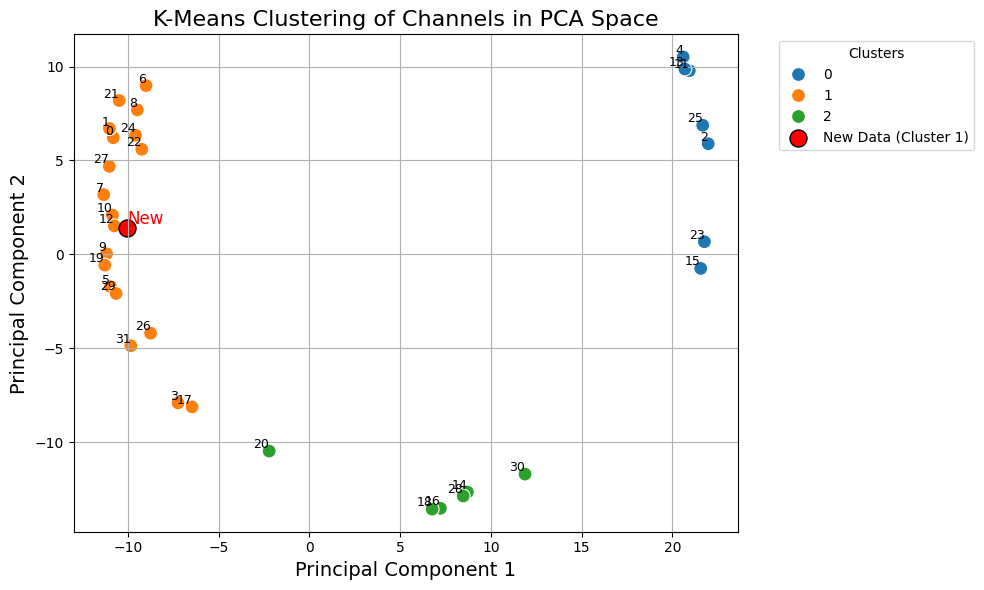

Cluster labels for each channel: [1 1 0 1 0 1 1 1 1 1 1 0 1 0 2 0 2 1 2 1 2 1 1 0 1 0 1 1 2 1 2 1]


In [101]:
extra_data = all_data_3D[eye_index, channel_index, start:end] 

# Visualize the clusters along with the extra data point
cluster_labels, extra_data_label, stimulation_artifact_ttx_std, extra_data_std, pca_model, kmeans_model =  cluster_channels(stimulation_artifact_ttx, n_clusters, n_components=2, extra_data=extra_data)
# Print the cluster labels for each channel
print("Cluster labels for each channel:", cluster_labels)


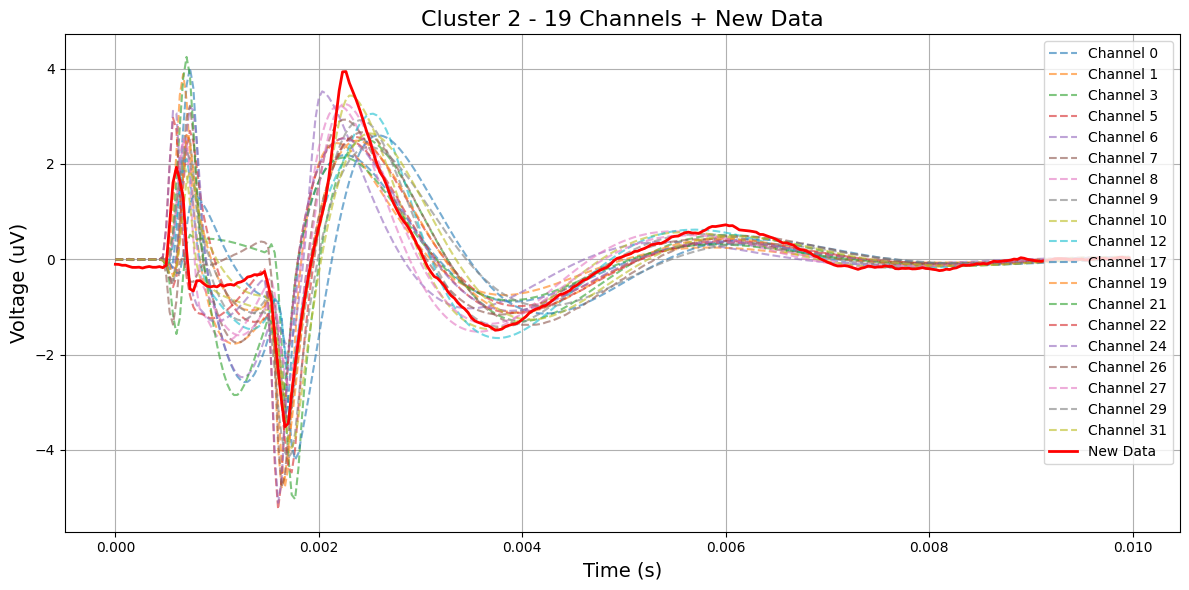

In [102]:
def plot_cluster_with_new_data(stimulation_artifact_ttx, cluster_labels, extra_data_label, extra_data_std, sampling_rate=30000):
    time = np.arange(0, stimulation_artifact_ttx.shape[1]) / sampling_rate 

    fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
    
    channels_in_cluster = np.where(cluster_labels == extra_data_label)[0]
    
    for channel in channels_in_cluster:
        ax.plot(time, stimulation_artifact_ttx[channel], alpha=0.6, label=f'Channel {channel}', linestyle='--')
    
    ax.plot(time, extra_data_std.flatten(), color='red', linewidth=2, label='New Data')

    ax.set_title(f'Cluster {extra_data_label + 1} - {len(channels_in_cluster)} Channels + New Data', fontsize=16)
    ax.set_xlabel('Time (s)', fontsize=14)
    ax.set_ylabel('Voltage (uV)', fontsize=14)
    ax.grid(True)
    ax.legend(loc='upper right', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()


plot_cluster_with_new_data(stimulation_artifact_ttx_std, cluster_labels, extra_data_label, extra_data_std)


## SA subtraction - all channels

In [96]:
# everything appears flipped
# eye_index = 1
# channel_index = 1
# offset = 3000
# sa_length = 300 
# start = 1770
# end = start + sa_length
# no_sa = 100 

In [27]:
eye_index = 3
channel_index = 1
offset = 3000
sa_length = 300 
start = 610
end = start + sa_length
no_sa = 100 

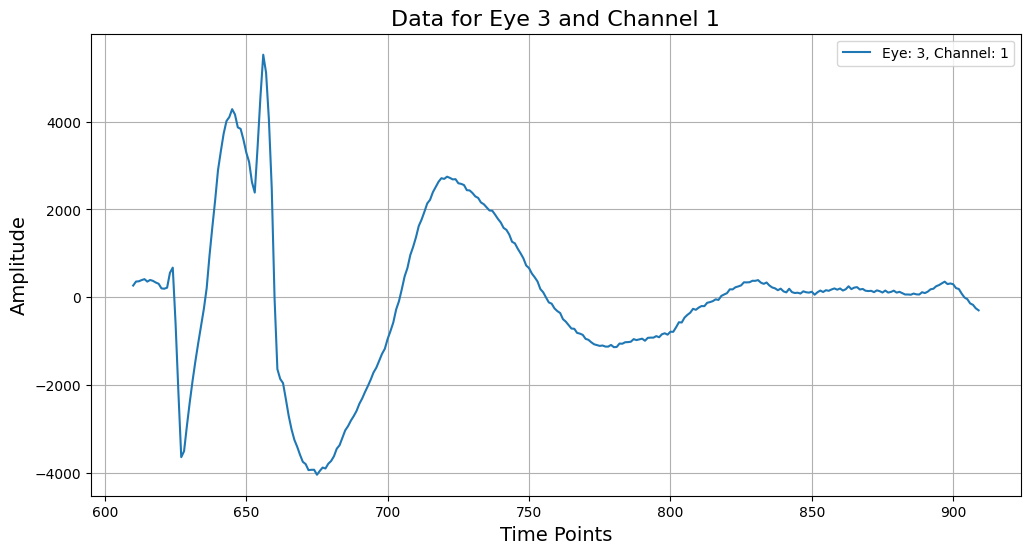

In [28]:
# Function to plot data for a specific eye and channel
def plot_data(all_data, eye_index, channel_index, start, end):
    # Extract the specified data
    data_to_plot = all_data[eye_index, channel_index, start:end]
    
    # Create the time axis for the x-axis
    time_axis = np.arange(start, end)

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(time_axis, data_to_plot, label=f'Eye: {eye_index}, Channel: {channel_index}')
    plt.title(f'Data for Eye {eye_index} and Channel {channel_index}', fontsize=16)
    plt.xlabel('Time Points', fontsize=14)
    plt.ylabel('Amplitude', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

# Call the plotting function
plot_data(all_data_3D_TTX, eye_index, channel_index, start, end)


In [29]:
def collect_and_average_stimulation_artifacts(all_data, eye_index, start, sa_length, offset, no_sa):
    ttx = all_data[eye_index]
    sa = []

    for channel in range(ttx.shape[0]):
        channel_data = ttx[channel] 
        for i in range(no_sa):
            end_index = start + sa_length + i * offset
            if end_index <= len(channel_data):
                sa.append(channel_data[start + i * offset: end_index])
            else:
                print(f"Skipping channel {channel}, artifact {i}: Out of bounds (end_index={end_index})")

    sa = np.array(sa)
    stimulation_artifact_ttx = sa.mean(axis=0)
    return stimulation_artifact_ttx


def plot_average_stimulation_artifact(stimulation_artifact_ttx):
    # Generate a time axis for plotting
    time = np.arange(0, len(stimulation_artifact_ttx)) / 30000  # Assuming a sampling rate of 30,000 Hz
    plt.figure(figsize=(12, 6))
    plt.plot(time[0:len(stimulation_artifact_ttx)], stimulation_artifact_ttx, color='orange', linewidth=2)
    plt.title("Averaged TTX Stimulation Artifact", fontsize=16)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Voltage (uV)', fontsize=14) # check unit
    plt.grid(True)
    plt.show()


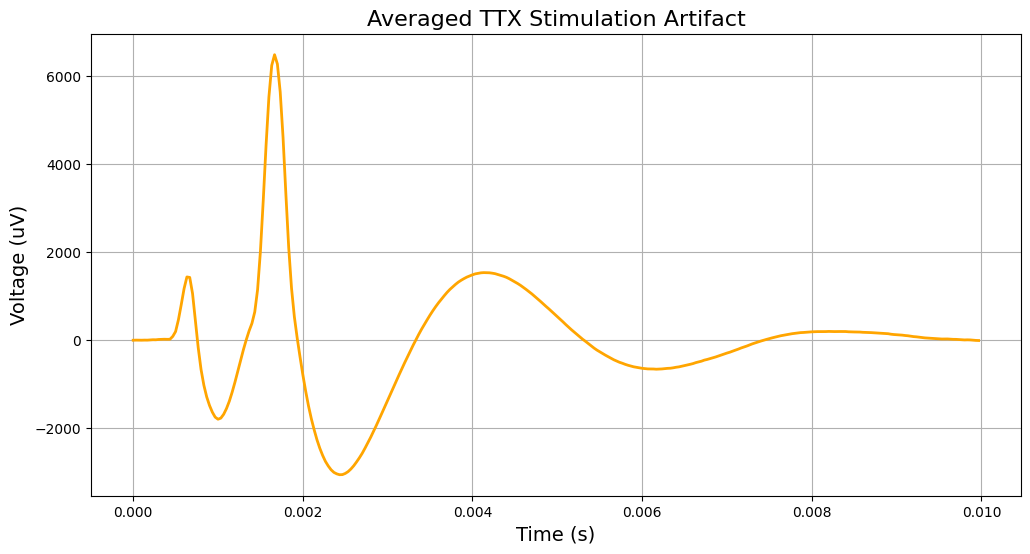

In [30]:
# Collect and average the stimulation artifacts
stimulation_artifact_ttx = collect_and_average_stimulation_artifacts(all_data_3D_TTX, eye_index, start, sa_length, offset, no_sa)

# Plot the averaged stimulation artifact
plot_average_stimulation_artifact(stimulation_artifact_ttx)

In [31]:
# Initialize an array for the stimulation artifact template
n_timepoints = np.shape(all_data_3D_TTX)[2]
stimulation_artifact_full = np.zeros(n_timepoints)

# Insert the stimulation artifact at specified intervals
for i in range(no_sa):
    segment_start = start + i * offset
    segment_end = segment_start + sa_length
    
    # Check bounds to ensure we don't exceed the array size
    if segment_end <= n_timepoints:
        stimulation_artifact_full[segment_start:segment_end] += stimulation_artifact_ttx
    else:
        print(f"Skipping iteration {i}: segment exceeds bounds (start={segment_start}, end={segment_end})")

# Example output to verify the result
print("Stimulation artifact full shape:", stimulation_artifact_full.shape)

Stimulation artifact full shape: (300300,)


In [45]:

stimulation_artifact_full = stimulation_artifact_full[5:]

stimulation_artifact_full = np.concatenate((stimulation_artifact_full,np.zeros(5)))


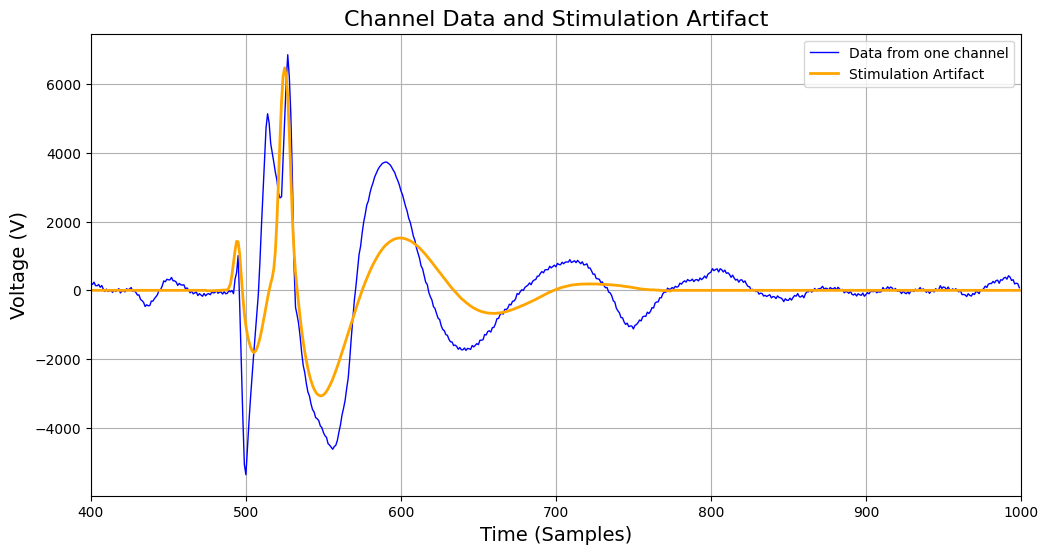

In [46]:
# Define the range for plotting
plot_start = 400  # Start of the range
plot_end = 1000   # End of the range
channel_index = 4
# Extract data for the specified eye and channel
channel_data = all_data_3D[eye_index, channel_index, plot_start:plot_end]
artifact_data = stimulation_artifact_full[plot_start:plot_end]

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting all_data_3D for the specific eye and channel
plt.plot(np.arange(plot_start, plot_end), channel_data, label='Data from one channel', color='blue', linewidth=1)

# Plotting the stimulation artifact
plt.plot(np.arange(plot_start, plot_end), artifact_data, label='Stimulation Artifact', color='orange', linewidth=2)

# Adding titles and labels
plt.title("Channel Data and Stimulation Artifact", fontsize=16)
plt.xlabel('Time (Samples)', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.legend()
plt.grid()
plt.xlim(plot_start, plot_end)
plt.show()



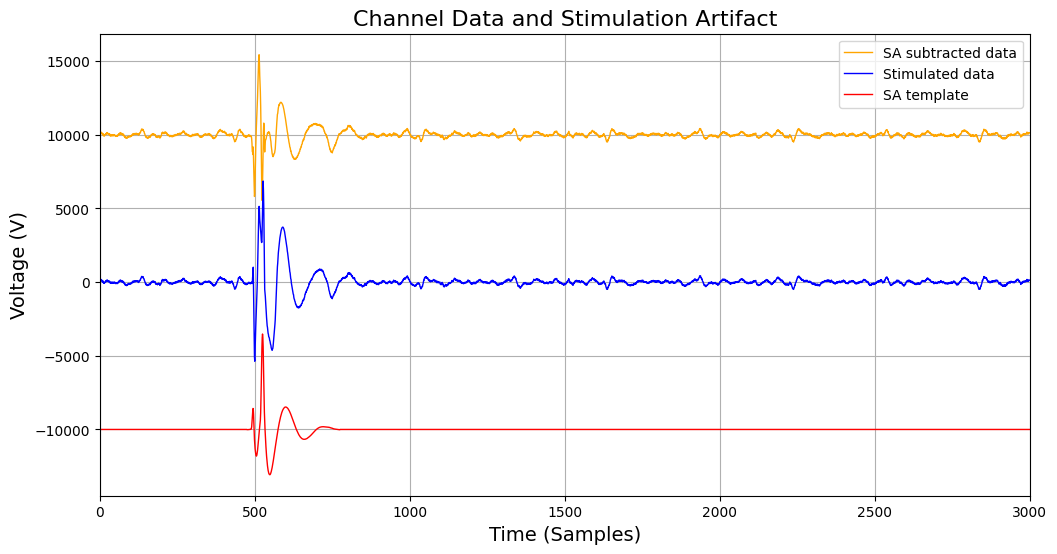

In [60]:
sa_subtracted_data_3D = np.copy(all_data_3D[eye_index,channel_index,:])
sa_subtracted_data_3D = sa_subtracted_data_3D - stimulation_artifact_full*1.3

plot_start = 0  # Start of the range
plot_end = 3000   # End of the range

sa_subtracted_data_3D = sa_subtracted_data_3D[plot_start:plot_end]+10000


# Create the plot
plt.figure(figsize=(12, 6))


plt.plot(np.arange(plot_start, plot_end), sa_subtracted_data_3D, label='SA subtracted data', color='orange', linewidth=1)
plt.plot(np.arange(plot_start, plot_end), all_data_3D[eye_index,channel_index,:][plot_start:plot_end], label='Stimulated data', color='blue', linewidth=1)
plt.plot(np.arange(plot_start, plot_end), stimulation_artifact_full[plot_start:plot_end]-10000, label='SA template', color='red', linewidth=1)


# Adding titles and labels
plt.title("Channel Data and Stimulation Artifact", fontsize=16)
plt.xlabel('Time (Samples)', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.legend()
plt.grid()
plt.xlim(plot_start, plot_end)
plt.show()

## ICA

In [36]:
data = all_data_3D[4]
data = data.T  # Shape becomes (300300, 32)

# Initialize ICA
ica = FastICA(n_components=32, random_state=4)

# Fit the model and transform the data
ica_components = ica.fit_transform(data)

# Get the mixing matrix
mixing_matrix = ica.mixing_

# The independent components are now in ica_components
print(ica_components.shape)  


(300300, 32)


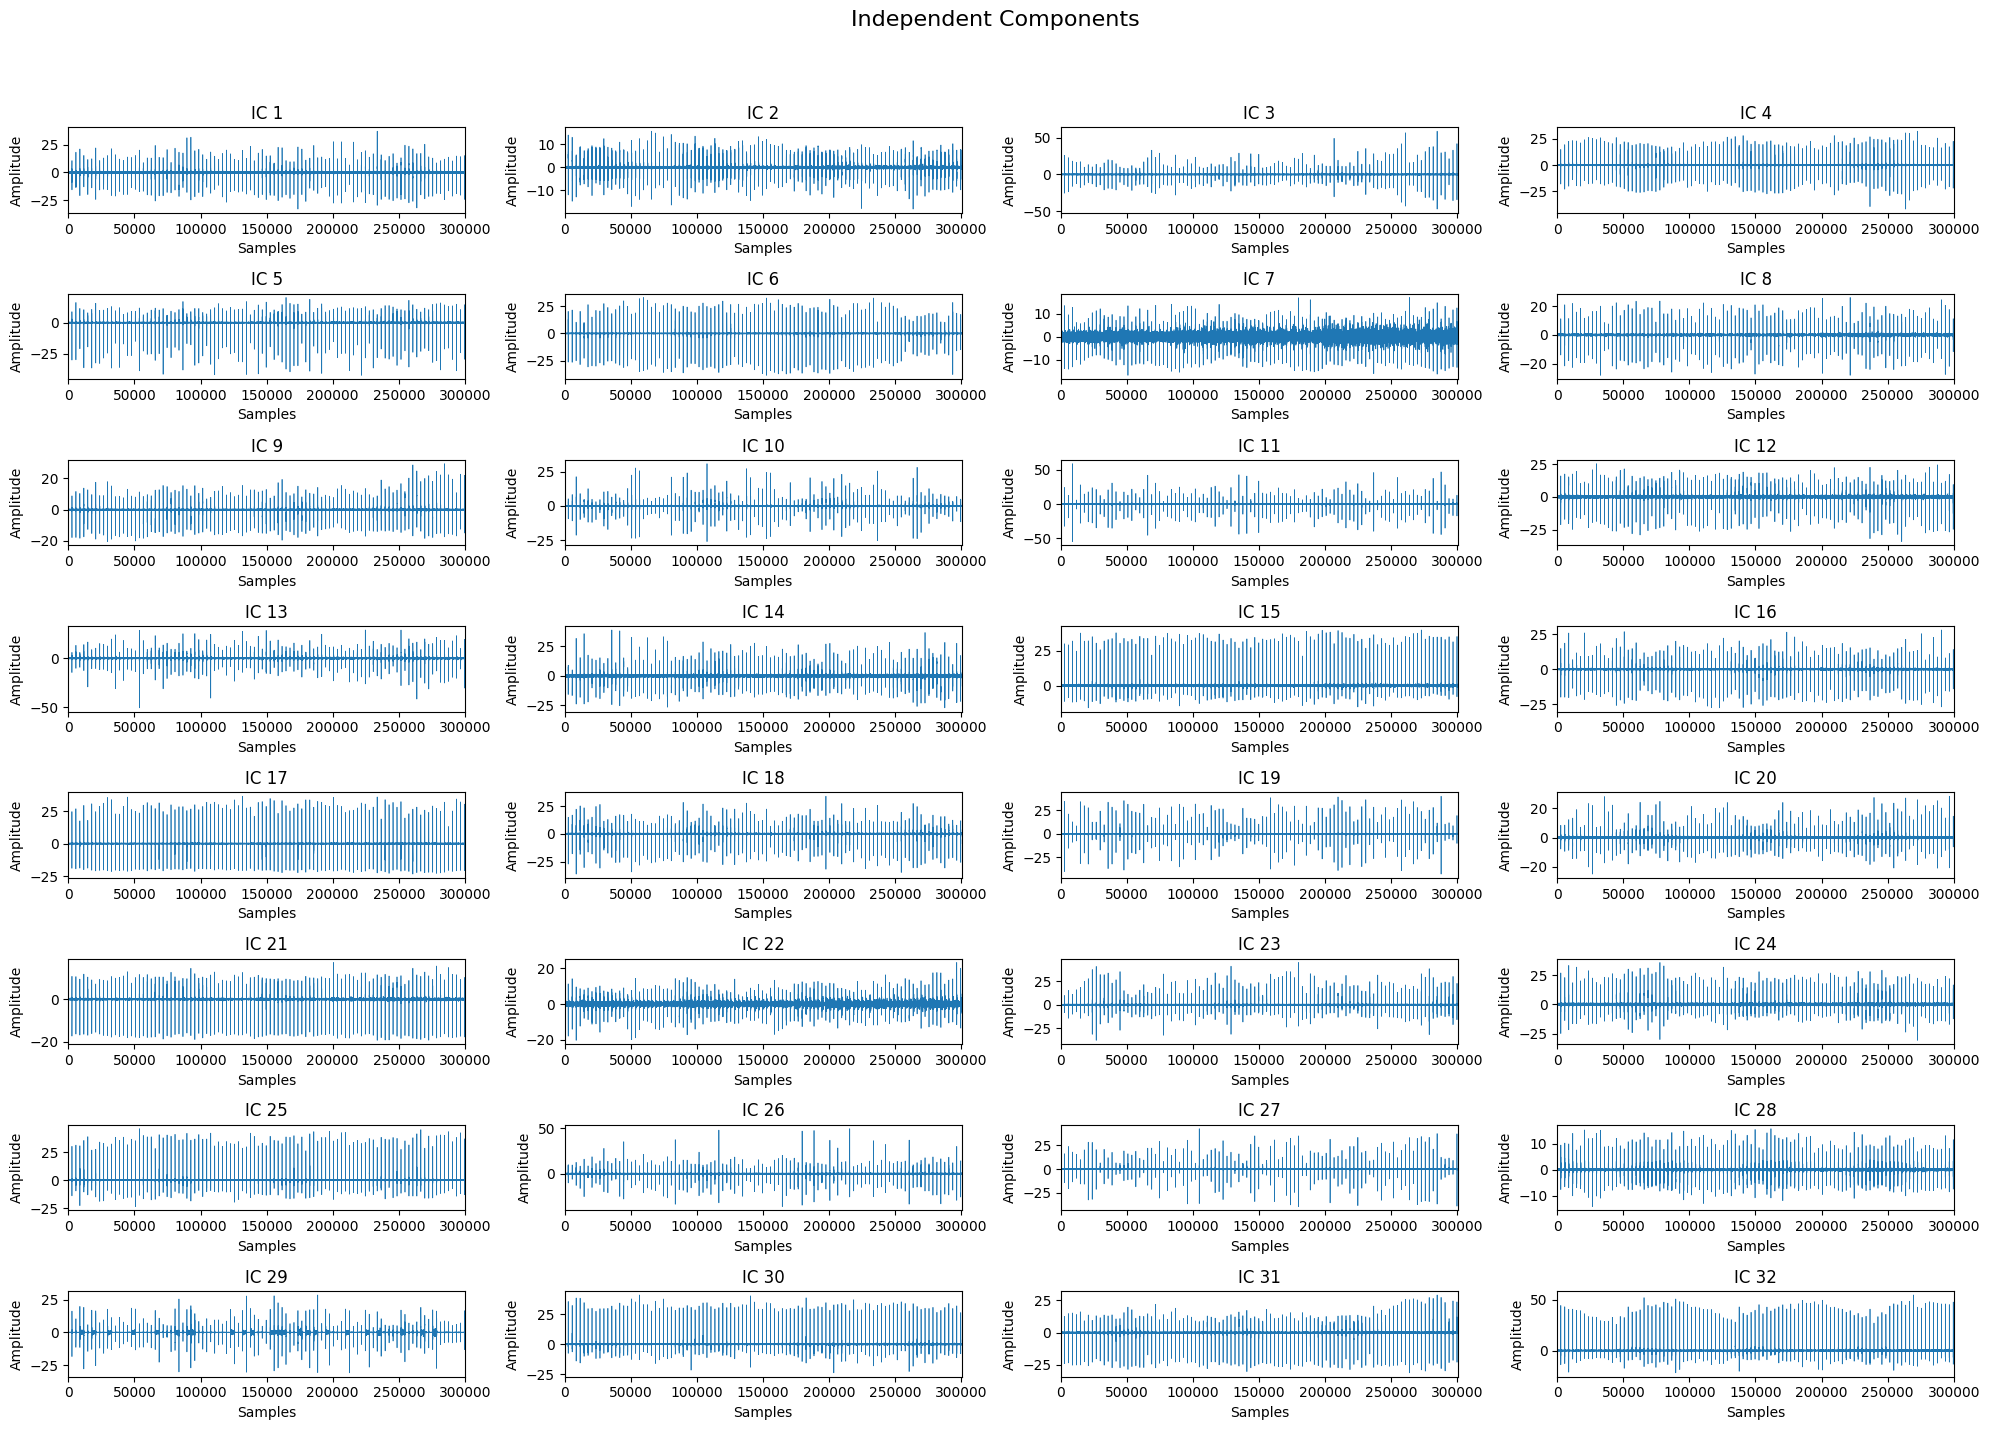

In [38]:
def plot_ics(ica_components, n_rows=8, n_cols=4):
    # Create a figure for plotting
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
    fig.suptitle('Independent Components', fontsize=16)

    # Loop through each component and plot
    for i in range(n_rows * n_cols):
        ax = axes[i // n_cols, i % n_cols]  # Get the right axis
        ax.plot(ica_components[:, i], lw=0.5)
        ax.set_title(f'IC {i+1}')
        ax.set_xlim([0, ica_components.shape[0]])
        ax.set_xlabel('Samples')
        ax.set_ylabel('Amplitude')

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage with 32 ICs
plot_ics(ica_components, n_rows=8, n_cols=4)


In [72]:
# Extract the first two independent components for 2D plotting
ic1 = ica_components[:, 0]
ic2 = ica_components[:, 1]
ic3 = ica_components[:, 2]

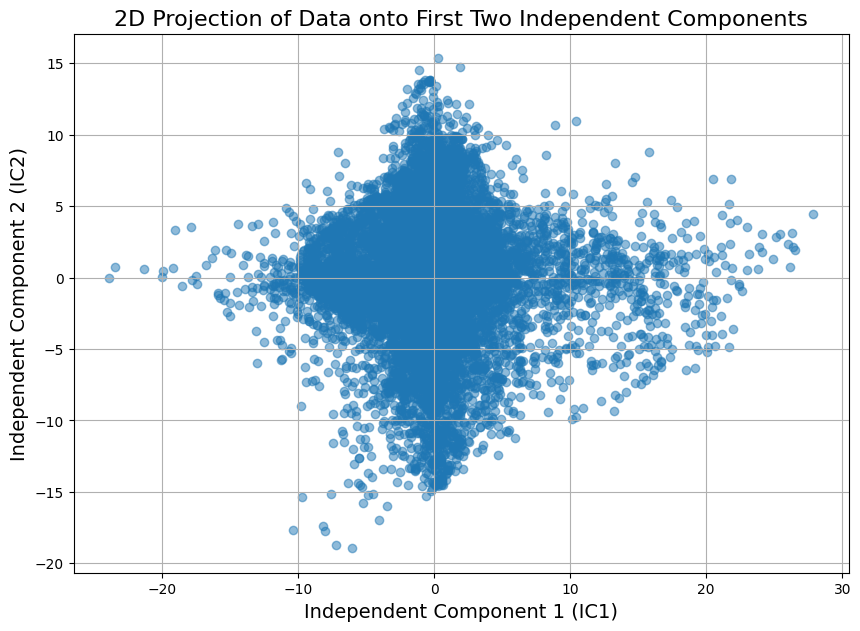

In [74]:
def plot_ica_2d(ic1, ic2):
    plt.figure(figsize=(10, 7))
    plt.scatter(ic1, ic2, alpha=0.5)
    plt.title('2D Projection of Data onto First Two Independent Components', fontsize=16)
    plt.xlabel('Independent Component 1 (IC1)', fontsize=14)
    plt.ylabel('Independent Component 2 (IC2)', fontsize=14)
    plt.grid(True)
    plt.show()

# Plot the 2D projection
plot_ica_2d(ic1, ic2)

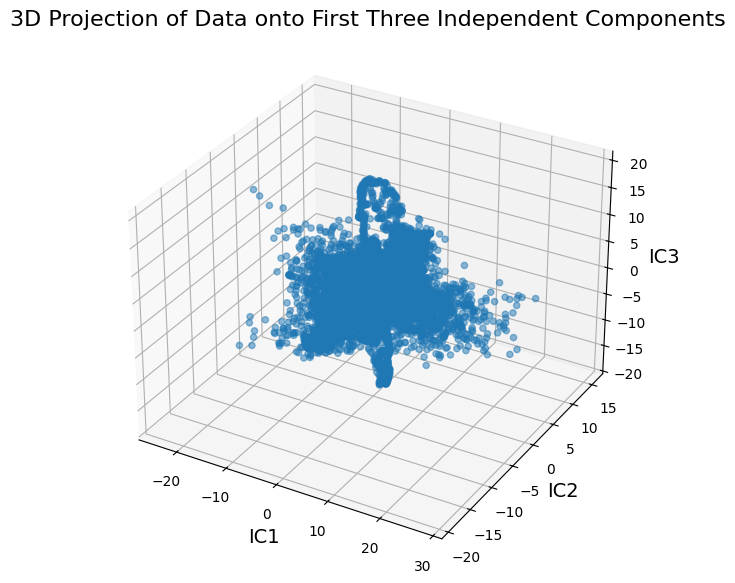

In [73]:
def plot_ica_3d(ic1, ic2, ic3):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ic1, ic2, ic3, alpha=0.5)
    ax.set_title('3D Projection of Data onto First Three Independent Components', fontsize=16)
    ax.set_xlabel('IC1', fontsize=14)
    ax.set_ylabel('IC2', fontsize=14)
    ax.set_zlabel('IC3', fontsize=14)
    plt.show()

# Plot the 3D projection
plot_ica_3d(ic1, ic2, ic3)

/Users/marielunde/Desktop/Thesis/venv_thesis/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/marielunde/Desktop/Thesis/venv_thesis/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/marielunde/Desktop/Thesis/venv_thesis/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/marielunde/Desktop/Thesis/venv_thesis/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/marielunde/Desktop/Th

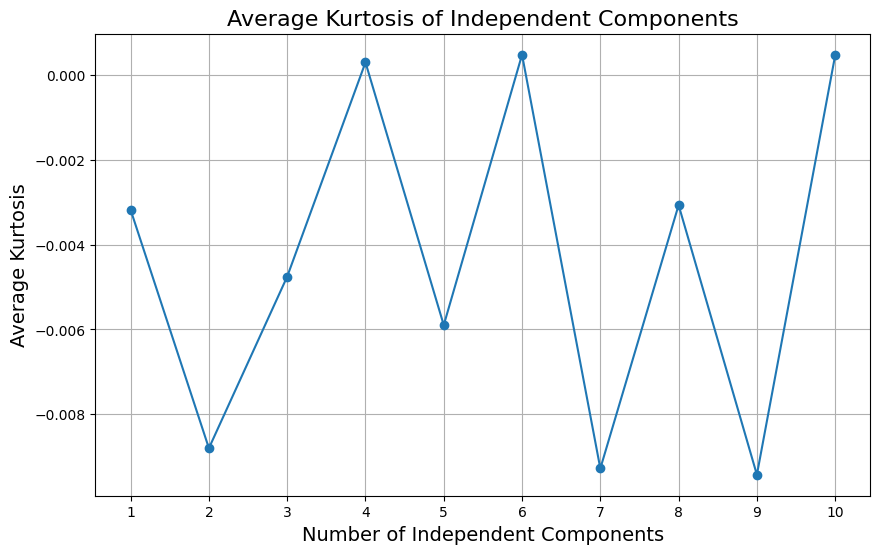

In [79]:
max_components = 10  # Max number of independent components to test
kurtosis_values = []

for n_components in range(1, max_components + 1):
    ica = FastICA(n_components=n_components, random_state=42)
    ica_components = ica.fit_transform(data)
    # Compute kurtosis for each component
    kurt_values = kurtosis(ica_components, axis=0, fisher=True)  # Fisher's definition (subtracts 3)
    avg_kurtosis = np.mean(kurt_values)  # Average kurtosis across components
    kurtosis_values.append(avg_kurtosis)

# Plot cumulative kurtosis
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), kurtosis_values, marker='o')
plt.title('Average Kurtosis of Independent Components', fontsize=16)
plt.xlabel('Number of Independent Components', fontsize=14)
plt.ylabel('Average Kurtosis', fontsize=14)
plt.grid(True)
plt.xticks(range(1, max_components + 1))
plt.show()


## PCA

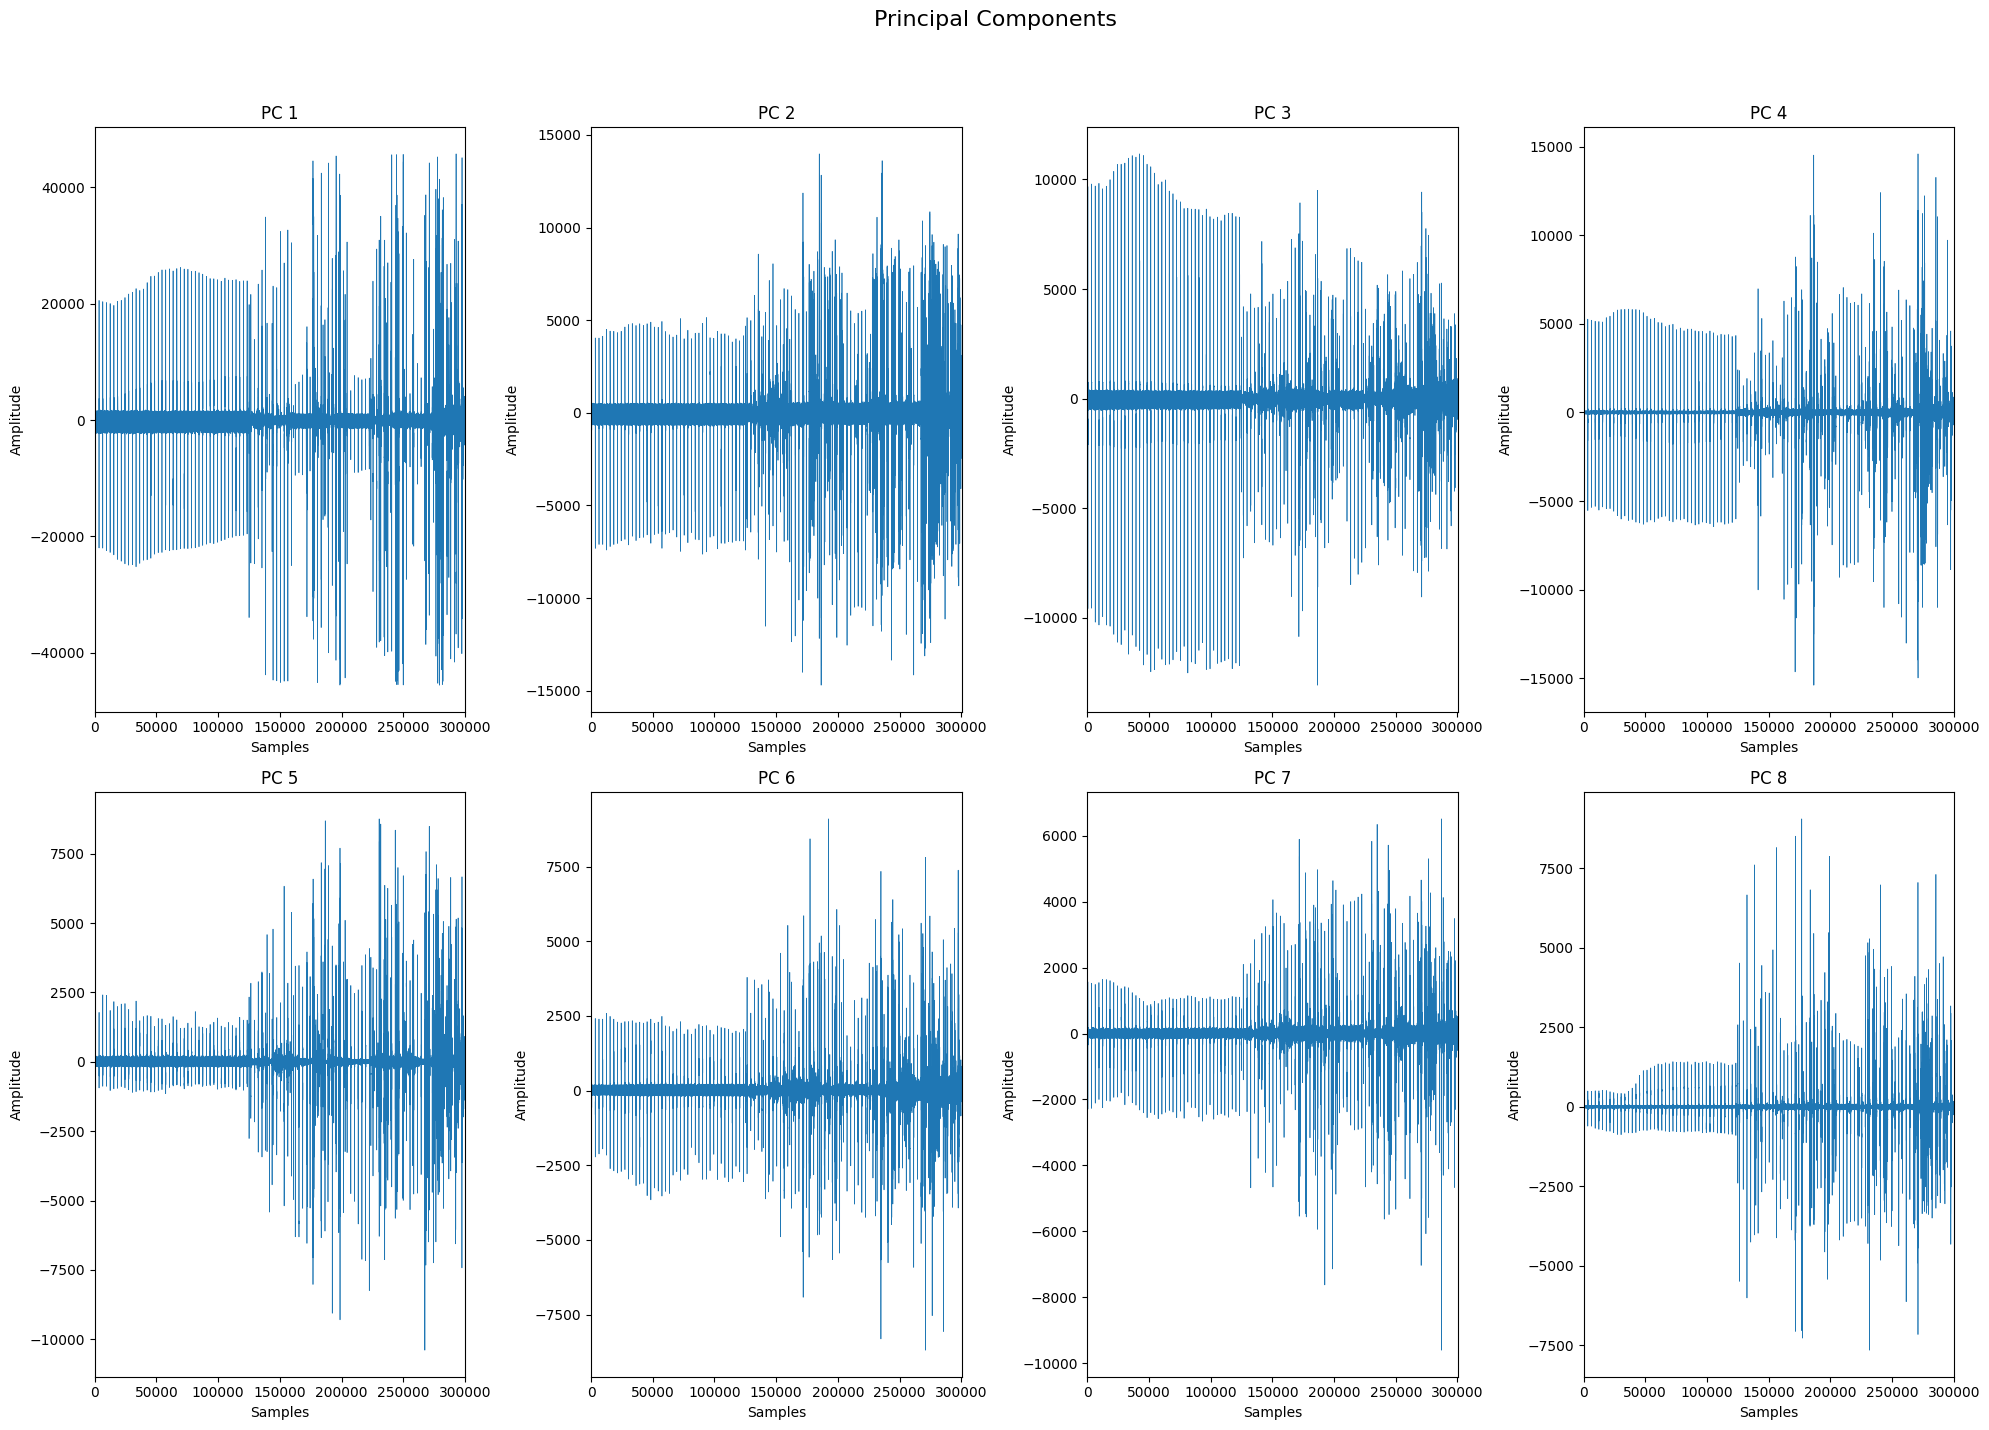

In [69]:
data = all_data_3D[1]
data = data.T  # Shape becomes (300300, 32)

# Perform PCA
pca = PCA(n_components=8)
pca_components = pca.fit_transform(data)

# Function to plot the principal components
def plot_pcs(pca_components, n_rows=8, n_cols=4):
    # Create a figure for plotting
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
    fig.suptitle('Principal Components', fontsize=16)

    # Loop through each component and plot
    for i in range(n_rows * n_cols):
        ax = axes[i // n_cols, i % n_cols]  # Get the right axis
        ax.plot(pca_components[:, i], lw=0.5)
        ax.set_title(f'PC {i+1}')
        ax.set_xlim([0, pca_components.shape[0]])
        ax.set_xlabel('Samples')
        ax.set_ylabel('Amplitude')

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage with 32 PCs
plot_pcs(pca_components, n_rows=2, n_cols=4)


In [66]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")


Explained variance by each component: [0.77050686 0.08920451 0.03773019 0.02887695 0.01607248 0.01238313
 0.00811135 0.00754891]


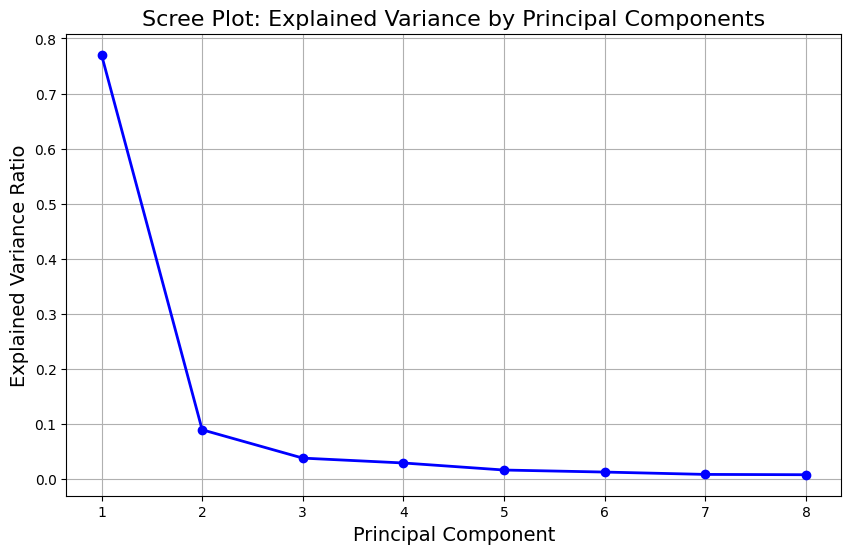

In [67]:
def plot_scree(explained_variance):
    # Number of components
    n_components = len(explained_variance)
    
    # Create a scree plot
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, n_components + 1), explained_variance, 'o-', linewidth=2, color='b')
    plt.title('Scree Plot: Explained Variance by Principal Components', fontsize=16)
    plt.xlabel('Principal Component', fontsize=14)
    plt.ylabel('Explained Variance Ratio', fontsize=14)
    plt.xticks(np.arange(1, n_components + 1))
    plt.grid(True)
    plt.show()

# Plot the scree plot
plot_scree(explained_variance)

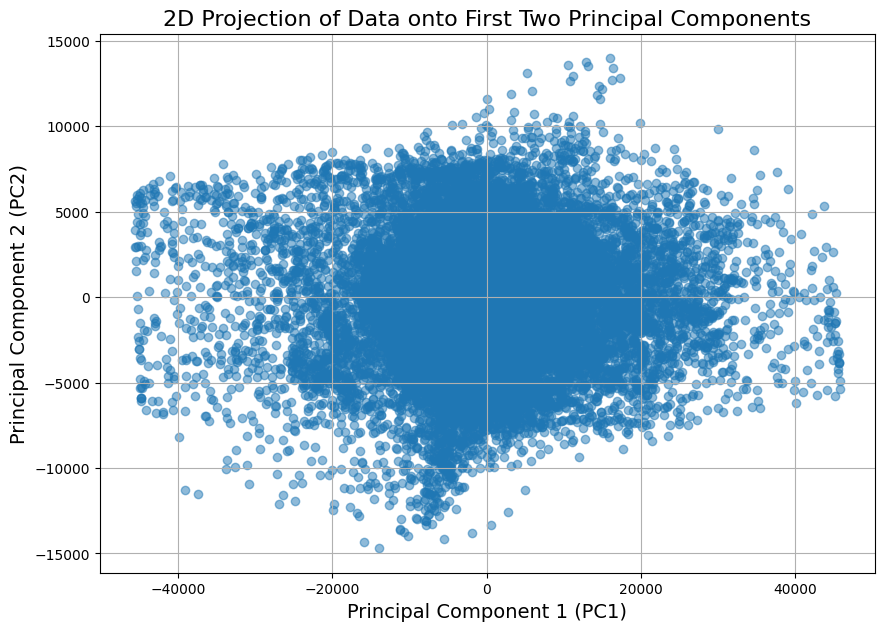

In [68]:
pc1 = pca_components[:, 0]
pc2 = pca_components[:, 1]

def plot_pca_2d(pc1, pc2):
    plt.figure(figsize=(10, 7))
    plt.scatter(pc1, pc2, alpha=0.5)
    plt.title('2D Projection of Data onto First Two Principal Components', fontsize=16)
    plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
    plt.ylabel('Principal Component 2 (PC2)', fontsize=14)
    plt.grid(True)
    plt.show()

# Plot the 2D projection
plot_pca_2d(pc1, pc2)


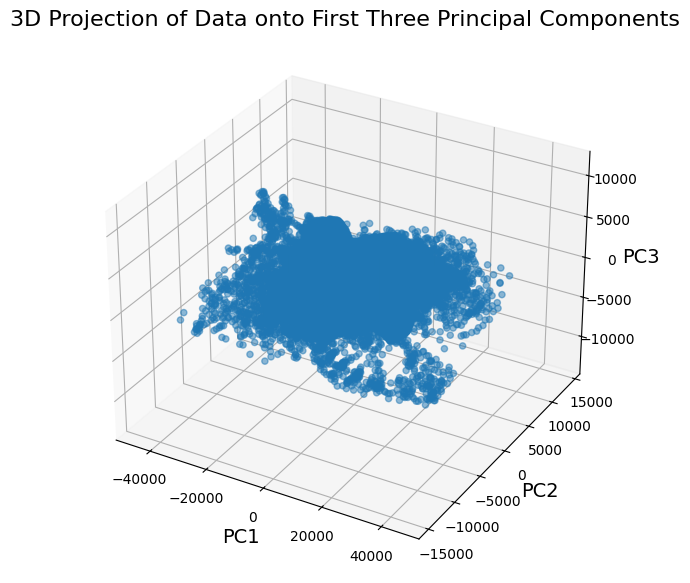

In [60]:

# Get the first three principal components for 3D plotting
pc1 = pca_components[:, 0]
pc2 = pca_components[:, 1]
pc3 = pca_components[:, 2]

def plot_pca_3d(pc1, pc2, pc3):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pc1, pc2, pc3, alpha=0.5)
    ax.set_title('3D Projection of Data onto First Three Principal Components', fontsize=16)
    ax.set_xlabel('PC1', fontsize=14)
    ax.set_ylabel('PC2', fontsize=14)
    ax.set_zlabel('PC3', fontsize=14)
    plt.show()

# Plot the 3D projection
plot_pca_3d(pc1, pc2, pc3)
